## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [3]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,1,0,1,0,False
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,0,0,0,0,1,0,False
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,False


In [15]:
data1=app_train[["TARGET","AMT_INCOME_TOTAL"]]
data1

,TARGET,AMT_INCOME_TOTAL
0,1,202500.000
1,0,270000.000
2,0,67500.000
3,0,135000.000
4,0,121500.000
5,0,99000.000
6,0,171000.000
7,0,360000.000
8,0,112500.000
9,0,135000.000


In [38]:
data1["INCOME"] = pd.qcut(data1["AMT_INCOME_TOTAL"],q = 9)
data1 = data1.sort_values(by = "INCOME" )
data1

,TARGET,AMT_INCOME_TOTAL,INCOME
1678,0,25650.0,"(25649.999, 85500.0]"
31676,0,72000.0,"(25649.999, 85500.0]"
227923,0,72000.0,"(25649.999, 85500.0]"
306004,0,72000.0,"(25649.999, 85500.0]"
213770,1,72000.0,"(25649.999, 85500.0]"
107184,0,72000.0,"(25649.999, 85500.0]"
130456,0,72000.0,"(25649.999, 85500.0]"
227964,1,72000.0,"(25649.999, 85500.0]"
32334,0,72000.0,"(25649.999, 85500.0]"
259044,0,72000.0,"(25649.999, 85500.0]"


In [39]:
groups = data1.groupby("INCOME").mean()
groups

,TARGET,AMT_INCOME_TOTAL
INCOME,,
"(25649.999, 85500.0]",0.081847,67224.215365
"(85500.0, 108000.0]",0.082700,93733.937108
"(108000.0, 117000.0]",0.087735,112820.239918
"(117000.0, 135000.0]",0.084697,132689.067845
"(135000.0, 157500.0]",0.087457,155057.680705
"(157500.0, 180000.0]",0.083741,177152.206299
"(180000.0, 216000.0]",0.080190,201823.174323
"(216000.0, 270000.0]",0.073128,241674.416788
"(270000.0, 117000000.0]",0.061375,393910.389377


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

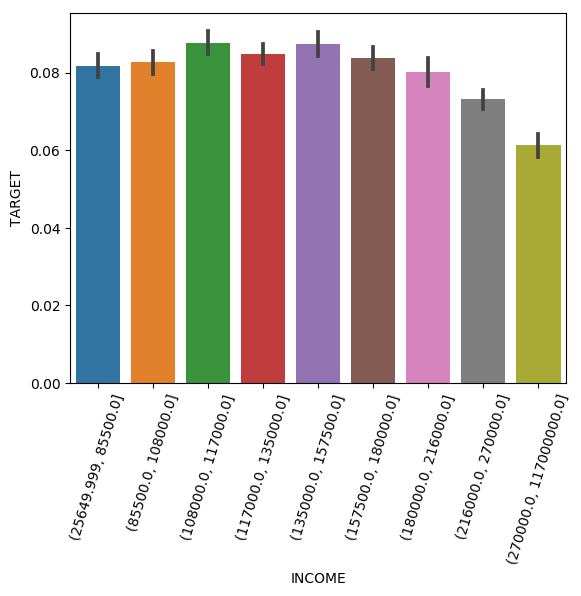

In [41]:
import seaborn as sns

px = "INCOME"
py = "TARGET"

sns.barplot(px, py,data= data1)
plt.xticks(rotation = 73)
